In [1]:
import kaggle

# Download latest version
kaggle.api.dataset_download_files("vinayakshanawad/cement-manufacturing-concrete-dataset", path='./Data/', unzip=True)

print("Download concluido")

Dataset URL: https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset
Download concluido


In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv("data/concrete.csv")
print(df.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  


In [3]:
# Verificar as correlações entre todas as variáveis, incluindo resistência à compressão
correlation_matrix = df.corr()
print("Matriz de correlação:\n", correlation_matrix)

Matriz de correlação:
                 cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.15437

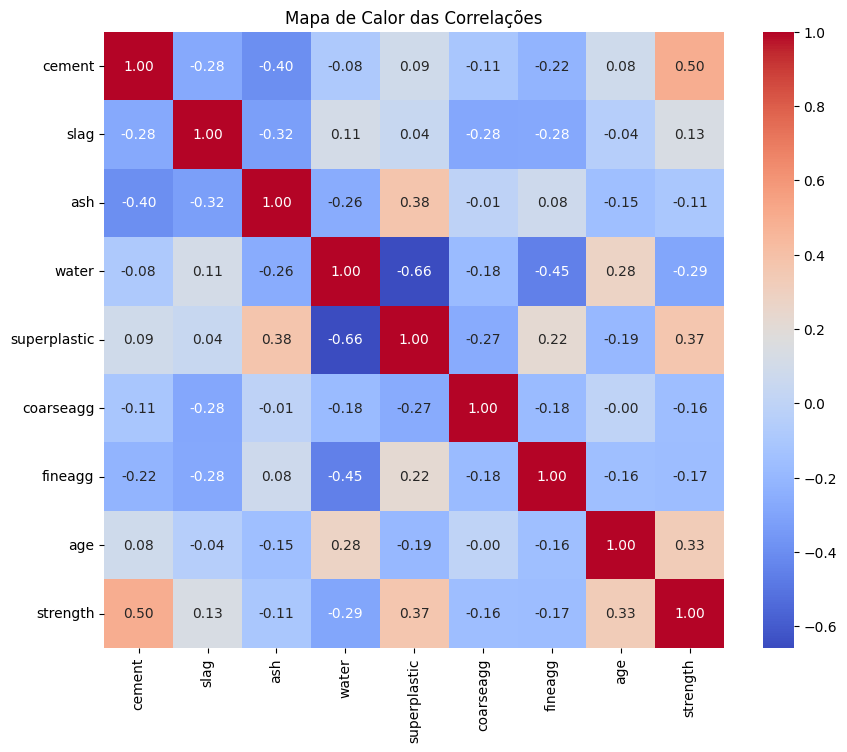

In [4]:
# Plotar o heatmap das correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor das Correlações")
plt.show()

In [ ]:
# Verificar a correlação de cada ingrediente com a resistência à compressão
resistencia = 'strength' 
ingredientes = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
for ingrediente in ingredientes:
    corr, _ = pearsonr(df[ingrediente], df[resistencia])
    print(f"Correlação entre {ingrediente} e resistência à compressão: {corr:.2f}")


Correlação entre cement e resistência à compressão: 0.50
Correlação entre slag e resistência à compressão: 0.13
Correlação entre ash e resistência à compressão: -0.11
Correlação entre water e resistência à compressão: -0.29
Correlação entre superplastic e resistência à compressão: 0.37
Correlação entre coarseagg e resistência à compressão: -0.16
Correlação entre fineagg e resistência à compressão: -0.17
Correlação entre age e resistência à compressão: 0.33
